In [1]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [4]:
# Load dataset (change path if needed)
df = pd.read_csv("mnist_train.csv")

df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:, 1:].values   # pixels
y = df.iloc[:, 0].values    # labels

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (60000, 784)
Shape of y: (60000,)


In [6]:
X = X / 255.0   # Scale between 0 and 1

In [7]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
#LOGISTIC REGRESSION
#Train Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.922

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.88      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.93      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.91      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



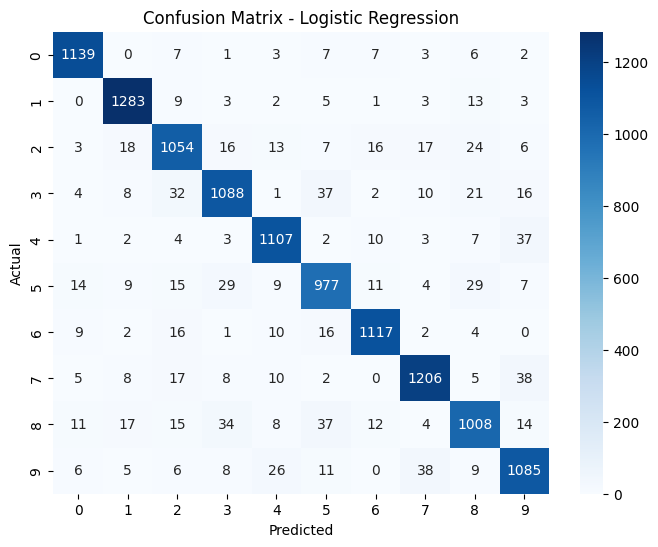

In [10]:
#Confusion Matrix (Logistic Regression)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
#MODEL 2: CNN (Deep Learning)


In [12]:
#Reshape for CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)

In [13]:
#Build CNN Model
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\ADMIN\.conda\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#Compile Model
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
#Train CNN
history = model_cnn.fit(
    X_train_cnn, y_train_cnn,
    epochs=5,
    validation_split=0.2,
    batch_size=64
)


Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9370 - loss: 0.2091 - val_accuracy: 0.9757 - val_loss: 0.0752
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9801 - loss: 0.0630 - val_accuracy: 0.9843 - val_loss: 0.0467
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9861 - loss: 0.0425 - val_accuracy: 0.9829 - val_loss: 0.0491
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.9874 - val_loss: 0.0396
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9878 - val_loss: 0.0400


In [16]:
#Evaluate CNN
loss, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test_cnn)
print("CNN Accuracy:", accuracy_cnn)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9883 - loss: 0.0397
CNN Accuracy: 0.9882500171661377


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


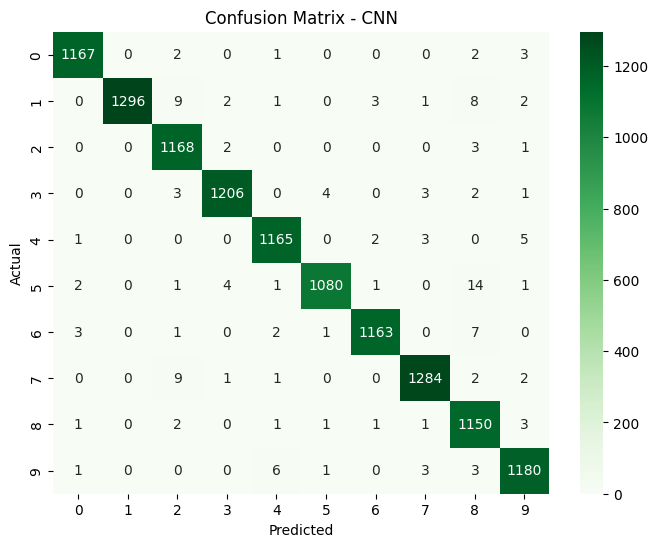

In [17]:
#Confusion Matrix (CNN)
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

cm_cnn = confusion_matrix(y_test, y_pred_cnn_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

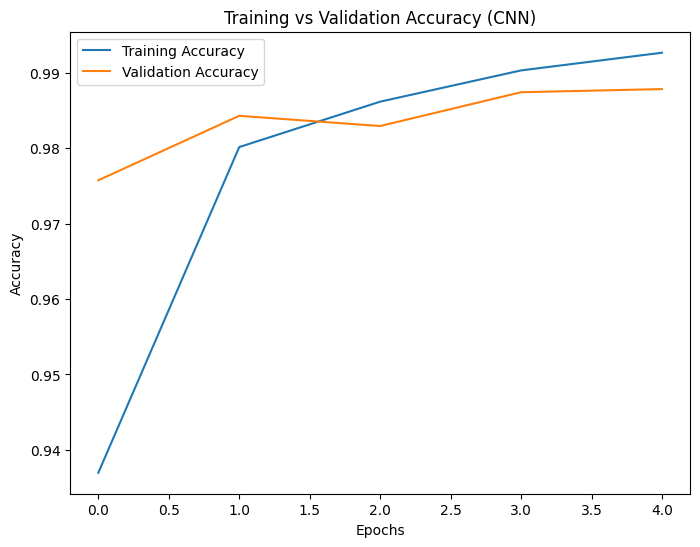

In [18]:
#Training vs Validation Accuracy Graph
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy (CNN)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
#Final Model Comparison
print("===================================")
print("Model Comparison")
print("===================================")
print("Logistic Regression Accuracy:", accuracy_lr)
print("CNN Accuracy:", accuracy_cnn)

Model Comparison
Logistic Regression Accuracy: 0.922
CNN Accuracy: 0.9882500171661377
